# developed by: Vanshika Maithani
# 4th Semester
# Graphic Era Hill University
# Topic : House Price Prediction

# IMPORTING REQUIRED PACKAGES

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sb   #for graphs,plots
import matplotlib.pyplot as plt  #data visualization
# sklearn/ scikit-learn : implement various machine learning models for regression, classification, clustering
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor   
from sklearn.ensemble import RandomForestRegressor  
from sklearn import metrics   # For evaluating model performance

# LOADING DATASET

- The dataset is California Housing Prices Data (5 new features!).  
- Median house prices for California districts derived from the 1990 census.
- It is a modified version of the California Housing Data used in the paper Pace, R. Kelley, and Ronald Barry.
- Loading the dataset with the help of pandas.

In [2]:
dataset = pd.read_csv("California_Houses.csv")  

# TAKING A LOOK AT THE DATASET

In [3]:
dataset.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [4]:
dataset.shape   

(20640, 14)

__We can see that each row has 14 different attributes:__

    -> Median_House_Value        :  It has median house value within a block (measured in US Dollars).
    -> Median_Income             :  It describes the median income for households (measured in 10000 of US Dollars).
    -> Median_Age                :  It describes about the median age of a house within a block.
    -> Tot_Rooms                 :  It describes the total number of rooms in a block.
    -> Tot_Bedrooms              :  It describes the total number of bedrooms in a block.
    -> Population                :  It shows the total number of people residing within a block.
    -> Households                :  It describes the number of people residing within a home unit, for a block.
    -> Latitude                  :  A measure of latitude for a house.
    -> Longitude                 :  A measure of longitude for a house.
    -> Distance_to_coast         :  Distance to the nearest coast point.
    -> Distance_to_LA            :  Distance to the centre of Los Angeles.
    -> Distance_to_SanDiego      :  Distance to the centre of San Diego.
    -> Distance_to_SanJose       :  Distance to the centre of San Jose.
    -> Distance_to_SanFrancisco  :  Distance to the centre of San Francisco.

In [5]:
dataset.info() 
# function provides a summary of the DataFrame,
#including the column names, the data types of each column, the number of non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

__We can see that:__
- There are 20640 instances in the dataset.
- There are no missing values.
- All the values are numeric (float or int).

In [6]:
dataset.describe() 
#it gives statistical summary of the numerical column

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


__This shows the statistical summaries of our dataset.__

<Axes: xlabel='Distance_to_SanFrancisco', ylabel='Count'>

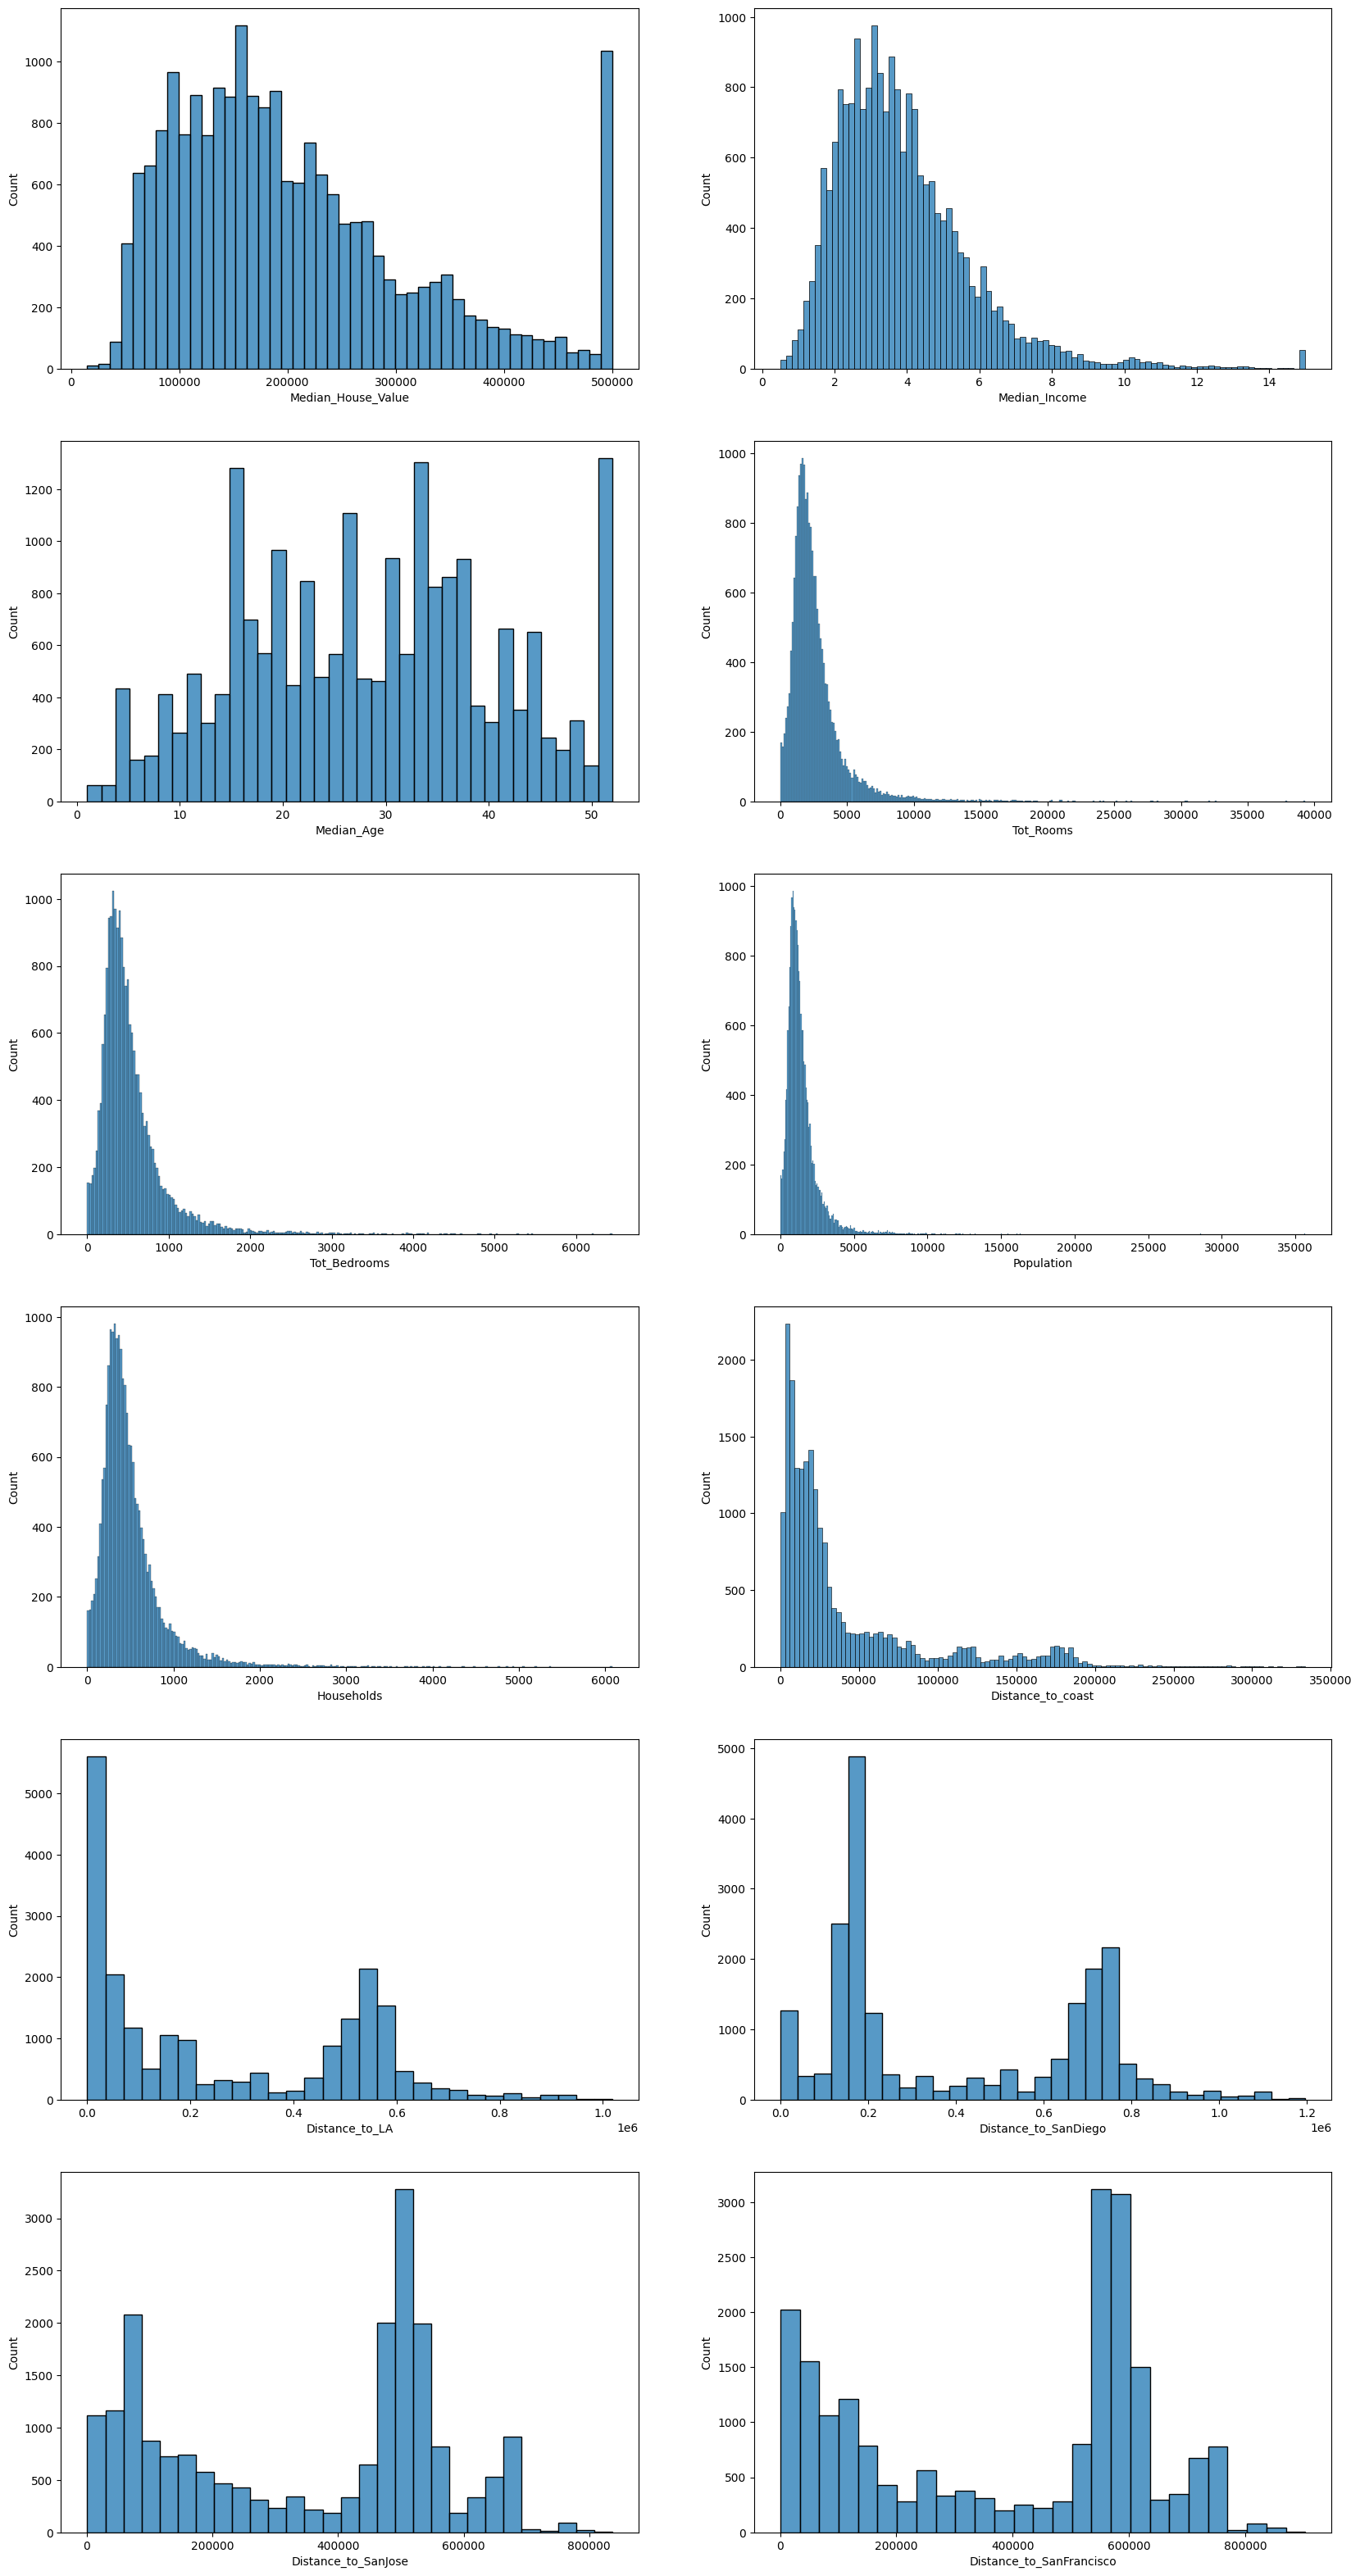

In [7]:
fig, axis = plt.subplots(6, 2, figsize=[20, 40])
#This line creates a figure with 6 rows and 2 columns of subplots, and sets the size of the figure to 20 inches in width and 40 inches in height. 
#The fig variable represents the entire figure,
#and the axis variable is a 2-dimensional array representing the individual subplots.
sb.histplot(dataset, x="Median_House_Value", ax=axis[0,0])
sb.histplot(dataset, x="Median_Income", ax=axis[0,1])
sb.histplot(dataset, x="Median_Age", ax=axis[1,0])
sb.histplot(dataset, x="Tot_Rooms", ax=axis[1,1])
sb.histplot(dataset, x="Tot_Bedrooms", ax=axis[2,0])
sb.histplot(dataset, x="Population", ax=axis[2,1])
sb.histplot(dataset, x="Households", ax=axis[3,0])
sb.histplot(dataset, x="Distance_to_coast", ax=axis[3,1])
sb.histplot(dataset, x="Distance_to_LA", ax=axis[4,0])
sb.histplot(dataset, x="Distance_to_SanDiego", ax=axis[4,1])
sb.histplot(dataset, x="Distance_to_SanJose", ax=axis[5,0])
sb.histplot(dataset, x="Distance_to_SanFrancisco", ax=axis[5,1])
#These lines use the sb.histplot() function from seaborn to create histograms of 
#different columns from the dataset DataFrame.


<Axes: xlabel='Longitude', ylabel='Latitude'>

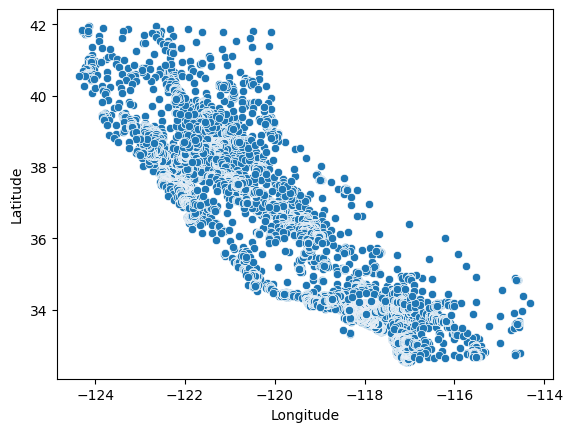

In [8]:
sb.scatterplot(data=dataset, x="Longitude", y="Latitude")
#function from the seaborn library to create a scatter plot of the geographical coordinates (longitude and latitude) 










__This is the graphical visulisation of the dataset attributes.__
- We observe that the attributes have very different scales so we need to perform feature scaling.
- Many histograms are tail heavy i.e. they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We need to transform these to have more bell-shaped distributions.

# CORRELATION MATRIX

<Axes: >

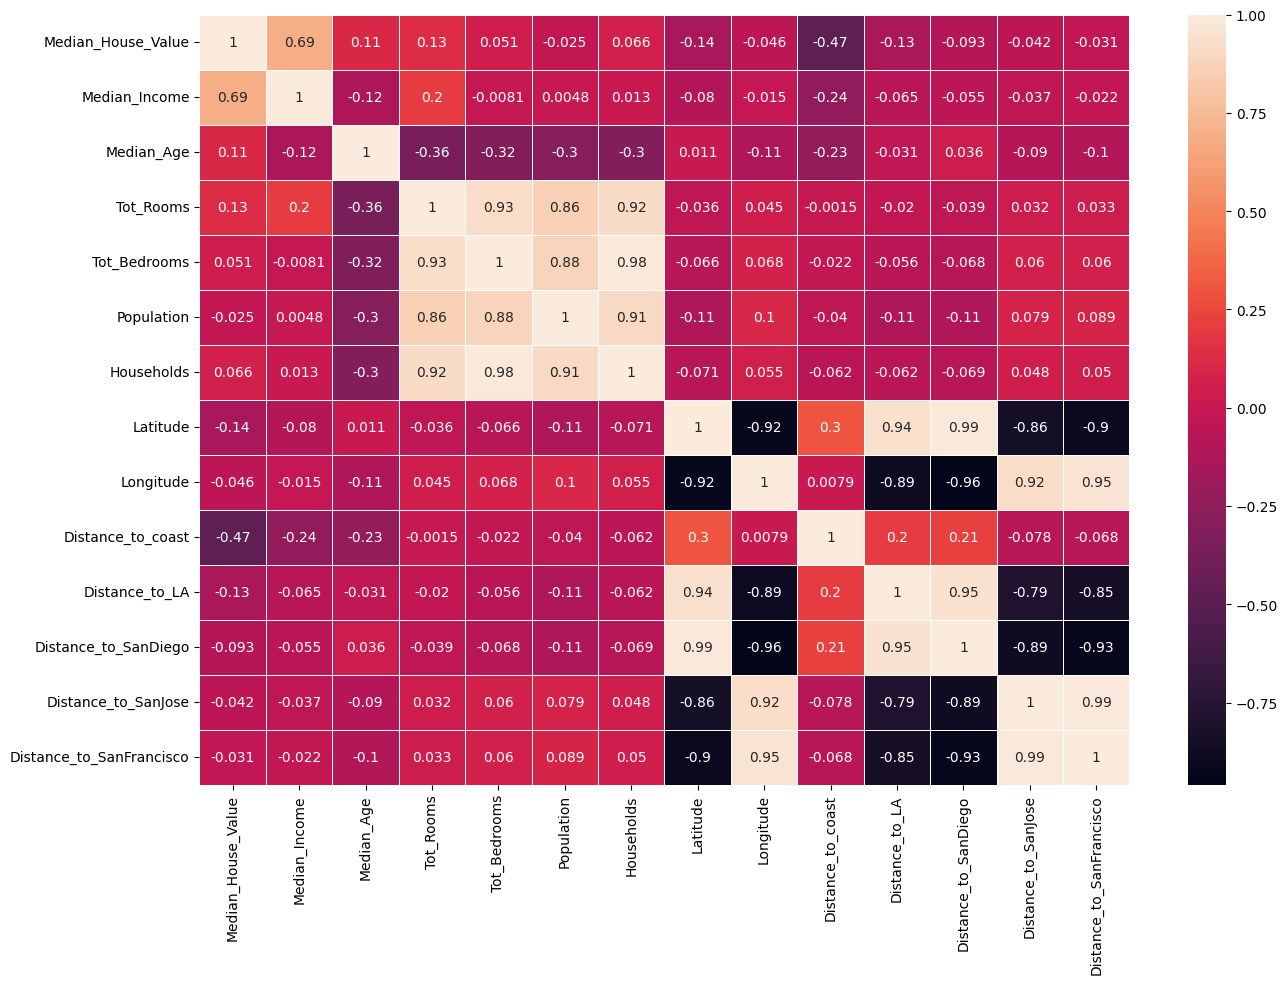

In [9]:
matrix = dataset.corr(method="pearson")  #this gives correlation between various data.(+ve or -ve)

fig, ax = plt.subplots(figsize=(15, 10))  #The fig variable represents the entire figure, 
#and the ax variable represents the axis object.

sb.heatmap(matrix,annot=True, linewidths=0.5, ax=ax)

#heatmap is a representation of how strongly the variables are related to each other.
#with positive correlations represented by warmer colors (e.g., red)
#and negative correlations represented by cooler colors (e.g., blue).  

# SPLITTING DATA FOR TRAINING / TESTING

In [10]:
dataset_features = dataset.drop("Median_House_Value", axis=1)
dataset_labels = dataset["Median_House_Value"].copy()

x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(dataset_features, dataset_labels, train_size=0.7, random_state = 0)
#It separates the features (input variables) and the labels (target variable) from the dataset DataFrame.

In [11]:
x_data_test #30% of test data

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
14740,4.1518,22,2101,399,1551,371,32.58,-117.05,8769.246350,197738.061745,18329.679021,688546.543564,756508.107401
10101,5.7796,32,2620,398,1296,429,33.92,-117.97,24251.439581,29205.023452,153558.889626,519464.581301,587499.529950
20566,4.3487,29,3167,548,1554,534,38.65,-121.84,60412.820664,604108.934378,783301.209361,146241.793823,110260.515699
2670,2.4511,37,709,187,390,142,33.20,-115.60,62373.781721,262467.377789,155283.111111,733077.017220,800350.640111
15709,5.0049,25,1637,394,649,379,37.79,-122.43,1634.623730,560978.041154,739479.269432,69241.813972,1785.873518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12156,4.1386,2,7401,1187,2826,839,33.66,-117.17,49027.125134,108312.939998,105000.641933,591313.136187,659225.830578
10211,7.8750,30,1631,212,523,216,33.89,-117.91,24422.868954,35669.032982,147962.249709,525648.489164,593682.532024
2445,2.0658,34,576,117,363,97,36.56,-119.64,169605.677315,306277.060449,483846.619161,217987.098999,281753.157450
17914,4.6761,32,1754,324,917,330,37.36,-121.99,14949.838541,499609.776996,677991.307862,8995.144485,60263.572638


In [12]:
y_data_train #labels for 70% of training data

256      100000.0
7887     285800.0
4581     175000.0
1993      59200.0
10326    283200.0
           ...   
13123    144600.0
19648    159400.0
9845     289300.0
10799    484600.0
2732      69400.0
Name: Median_House_Value, Length: 14447, dtype: float64

In [13]:
y_data_test  #labels for 30% of test data

14740    136900.0
10101    241300.0
20566    200700.0
2670      72500.0
15709    460000.0
           ...   
12156    177300.0
10211    351900.0
2445      92500.0
17914    298300.0
1989      47500.0
Name: Median_House_Value, Length: 6193, dtype: float64

# APPLYING FEATURE SCALING

In [14]:
sc = StandardScaler()
x_data_train.iloc[:, :] = sc.fit_transform(x_data_train.iloc[:, :])
x_data_test.iloc[:, :] = sc.transform(x_data_test.iloc[:, :])

#The code you provided applies feature scaling to the training and testing sets using the StandardScaler from scikit-learn.
#By performing feature scaling, you ensure that the features in both the training and testing sets have a similar scale, 
#The StandardScaler scales the features such that they have zero mean and unit variance, 

In [15]:
x_data_train.describe()  #scaled data summary 

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04
mean,1.495155e-16,1.283669e-16,5.385508e-17,1.091856e-16,6.541302e-17,2.508319e-17,-9.467673e-17,5.534039e-15,-5.508464e-17,1.455808e-16,5.213368e-17,6.885581e-17,2.124693e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.780399e+00,-2.192669e+00,-1.203876e+00,-1.270918e+00,-1.237234e+00,-1.301403e+00,-1.443865e+00,-2.383835e+00,-8.227638e-01,-1.084801e+00,-1.370203e+00,-1.607693e+00,-1.545815e+00
25%,-6.851851e-01,-8.429473e-01,-5.426883e-01,-5.753620e-01,-5.578281e-01,-5.757052e-01,-7.943631e-01,-1.113019e+00,-6.400508e-01,-9.559723e-01,-8.236521e-01,-1.089282e+00,-1.077139e+00
50%,-1.732852e-01,3.040183e-02,-2.351380e-01,-2.441449e-01,-2.263896e-01,-2.337394e-01,-6.401648e-01,5.365487e-01,-4.068984e-01,-3.877956e-01,-6.318998e-01,5.057374e-01,5.563594e-01
75%,4.596823e-01,6.655648e-01,2.316631e-01,2.597782e-01,2.598942e-01,2.726831e-01,9.719087e-01,7.807446e-01,1.914013e-01,1.038301e+00,1.062079e+00,7.722070e-01,7.912053e-01
max,5.887233e+00,1.856495e+00,1.368311e+01,1.397453e+01,2.980055e+01,1.457259e+01,2.953124e+00,2.619689e+00,5.984698e+00,3.018969e+00,2.755743e+00,2.241105e+00,2.063015e+00


# APPLYING ALGORITHMS

## Linear Regression

In [16]:
linear_model = LinearRegression()

linear_model.fit(x_data_train, y_data_train)

predicted_price = linear_model.predict(x_data_test)

__Now our model has been trained on the training dataset.__ <br>
__Predicting and evaluating the performance of the model.__

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_data_test, predicted_price))
print('Mean Squared Error:', metrics.mean_squared_error(y_data_test, predicted_price))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_data_test, predicted_price)))

Mean Absolute Error: 50051.73665244126
Mean Squared Error: 4806004203.407852
Root Mean Squared Error: 69325.3503662827


__The lesser the values for these metrics, the better is the performance of the algorithms.__ <br>
__Let us move to other algorithms.__

## Decision Tree Regression

In [18]:
dt_model = DecisionTreeRegressor()

dt_model.fit(x_data_train, y_data_train)
#This line fits the decision tree regression model to the training data.

predicted_price = dt_model.predict(x_data_test)
#takes the testing features as input and returns the predicted target values based on the learned decision tree.

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_data_test, predicted_price))
print('Mean Squared Error:', metrics.mean_squared_error(y_data_test, predicted_price))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_data_test, predicted_price)))

Mean Absolute Error: 41977.51622799935
Mean Squared Error: 4567201667.149685
Root Mean Squared Error: 67581.0747706019


## K-Nearest Neighbors Regression

In [20]:
knn_model = KNeighborsRegressor()

knn_model.fit(x_data_train, y_data_train)

predicted_price = knn_model.predict(x_data_test)

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_data_test, predicted_price))
print('Mean Squared Error:', metrics.mean_squared_error(y_data_test, predicted_price))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_data_test, predicted_price)))

Mean Absolute Error: 40320.77648958502
Mean Squared Error: 3715068885.7679057
Root Mean Squared Error: 60951.36492128709


__This is better from above models but it is not a great score.__<br>
__The Median_House_Value ranges between 14999 to 500000 so this typical prediction error is not very satisfying.__<br>
__Let us move to other algorithms.__

## Random Forest Regression

In [22]:
rf_model = RandomForestRegressor()

rf_model.fit(x_data_train.values, y_data_train)


predicted_price = rf_model.predict(x_data_test.values)


In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_data_test, predicted_price))
print('Mean Squared Error:', metrics.mean_squared_error(y_data_test, predicted_price))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_data_test, predicted_price)))

# Lower values of MAE, MSE, and RMSE indicate better predictive accuracy

Mean Absolute Error: 30729.21397384143
Mean Squared Error: 2312257537.195649
Root Mean Squared Error: 48085.93907989787


In [24]:
# Assume the trained random forest regression model (rf_model) is already available

# Custom input
custom_input = [[8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767]]  # Example custom input, modify as needed

# Predict the target variable
predicted_value = rf_model.predict(custom_input)

# Print the predicted value
print("Predicted Value: $",predicted_value)


Predicted Value: $ [311560.1]


__This is much Better.__

In [25]:
import pickle
#The pickle module in Python is used for object serialization and deserialization. 
#It allows you to save Python objects to disk in a binary format and later load them back into memory.

In [26]:
#saving the model as .pkl file

pkl_filename = "model.pkl" #This line defines the filename (model.pkl) that you want to use to save the trained model.

with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_model, file)
    
#This block of code opens the file specified by pkl_filename in write binary mode ('wb').
    

In [27]:
#checking the saved model accuracy
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)   # load the model from the model.pkl file into the pickle_model object.
score = pickle_model.score(x_data_test.values, y_data_test) #calculation of accuracy on the test data and its labels
#score: method returns the coefficient of determination R-squared of the model,
# A higher R-squared value indicates a better fit of the model to the data.
print(score)

0.8265935001023366


# CONCLUSION

In this study the four machine learning regression algorithms __Linear Regression__, __Decision Tree Regression__, __K-Nearest neighbour__ and __Random forest regression__ have been compared when trained and tested with the dataset.

This has been done in order to study how __accurately__ they, as machine learning methods, predict the prices for the house pricing problem.

I have found that the __Random forest regression algorithm performs better__ at predicting house prices than other with regards to all of the error metrics.